---
### Reducing the number of edges: find a rational rule

1. Set window: Confine the lifespan of event, probably 1-2 months. This is the easiest way. Plus, it is crucial for time-series analysis.  
One thing that should be considered is, there are two types of events: powerful or negligible.

2. it looks like power-law function. $f= p^{-t}$ is basic form of it, we (may) need to modify this. 

3. Using collective attention: how long a event-related hashtag survive. but it is hard to find event-specific hashtag, and also most of events are not mentioned in Twitter.

1 and 2 seems to be plausible (and probably work at the same time), but 3 seem like unfeasible.

---

In [7]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# import dataset
df = pd.read_csv("6before-network.csv", index_col=0)
df.head()

,ind,ind_t,date,adr,p,n_killed,n_injured,city,state,LON,...,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,mental_health_sources,sources_additional_age,type
0,0,0,2014-01-01,Rockingham Street and Berkley Avenue Extended ...,2.855649,2,2,Norfolk,Virginia,-76.278935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2014-01-03,Farmers Boulevard and 133rd Avenue Queens New ...,2.390389,1,3,Queens,New York,-73.762898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2014-01-05,829 Parade St Erie Pennsylvania,2.390389,1,3,Erie,Pennsylvania,-80.074524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2014-01-11,3430 W. Capitol Street Jackson Mississippi,1.515717,0,4,Jackson,Mississippi,-90.228321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2014-01-12,University Drive Huntsville Alabama,1.620657,0,5,Huntsville,Alabama,-86.650390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
log_n_killed = []
log_n_injured = []
for i in range(len(df)):
    killed = df['n_killed'][i]
    injured = df['n_injured'][i]
    log_killed = math.log(1 + killed)
    log_n_killed.append(log_killed)
    log_injured = math.log(1 + injured)
    log_n_injured.append(log_injured)

df['log_n_killed'] = log_n_killed
df['log_n_injured'] = log_n_injured

In [10]:
df['p'] = 0.7*df['log_n_killed'] + 0.3*df['log_n_injured']

In [13]:
## delete useless rows
df = df.drop(df.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis='columns')

In [14]:
df.to_csv("7logarithm_transformation.csv", index = False)

### if only relatively powerful events affect all future events within 7 days

In [20]:
G1 = nx.DiGraph()

In [21]:
for n in range(0, len(df), 1):
  G1.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n],
             p = df['p'][n],
             n_killed = df['log_n_killed'][n],
             n_injured = df['log_n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])

In [22]:
for i in G1.nodes():
  for j in G1.nodes():
    if 0 < G1.nodes[j]['ind_t']-G1.nodes[i]['ind_t'] < 7 and G1.nodes[i]['p'] > G1.nodes[j]['p']:
      G1.add_edge(i,j)
    else:
      pass

In [23]:
nx.info(G1)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 9453\nAverage in degree:   4.5295\nAverage out degree:   4.5295'

### Degree distribution

In [24]:
G1_degree = []
for i in range(len(G1.nodes())):
    G1_dgr = G1.degree(i)
    G1_degree.append(G1_dgr)

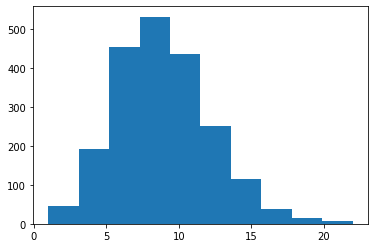

In [25]:
G1_dgr_dist = plt.hist(G1_degree)

In [26]:
nx.write_gexf(G1, "graph/G1.gexf")